<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/lab_6_DT_FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DECISION TREE CLASSIFIFCATION ON FOREST FIRE DATASET**


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree


**Data Collection and Pre-Processing**

In [ ]:
# data = pd.read_csv('forestfires.csv')
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')
data = data.dropna()

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

In [ ]:
# Convert categorical variables (months and days) into numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

data['month'] = [months_table.index(month) for month in data['month'] ]
data['day']   = [days_table.index(day)  for day in data['day'] ]

In [ ]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]
target = data.impact
# inputs = data.drop('impact', axis='columns')

# droping area column also 
inputs = data.drop(['area','impact'], axis='columns')

In [ ]:
data.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
105,4,5,2,5,85.9,19.5,57.3,2.8,12.7,52,6.3,0.0,0.00,0
250,8,5,7,3,93.1,157.3,666.7,13.5,26.8,25,3.1,0.0,0.68,1
185,2,5,8,2,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,1
309,2,4,8,0,92.4,105.8,758.1,9.9,24.9,27,2.2,0.0,0.00,0
511,8,6,7,0,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0


In [ ]:
# finding NaN values
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [ ]:
#dividing dataset into 80-20% training and testing 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

**Training Model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5256410256410257


**Visualization**

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        64
           1       0.62      0.54      0.58        92

    accuracy                           0.54       156
   macro avg       0.54      0.54      0.53       156
weighted avg       0.55      0.54      0.54       156



[Text(0.39456917475728154, 0.9772727272727273, 'X[8] <= 5.15\nentropy = 1.0\nsamples = 361\nvalue = [183, 178]'),
 Text(0.38162419093851135, 0.9318181818181818, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.4075141585760518, 0.9318181818181818, 'X[5] <= 89.75\nentropy = 0.999\nsamples = 353\nvalue = [183, 170]'),
 Text(0.17637540453074432, 0.8863636363636364, 'X[0] <= 4.5\nentropy = 0.938\nsamples = 124\nvalue = [80, 44]'),
 Text(0.07766990291262135, 0.8409090909090909, 'X[8] <= 24.2\nentropy = 0.677\nsamples = 56\nvalue = [46, 10]'),
 Text(0.06472491909385113, 0.7954545454545454, 'X[8] <= 16.85\nentropy = 0.605\nsamples = 54\nvalue = [46, 8]'),
 Text(0.038834951456310676, 0.75, 'X[5] <= 9.15\nentropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(0.025889967637540454, 0.7045454545454546, 'X[7] <= 3.05\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.012944983818770227, 0.6590909090909091, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.038834951456310676, 0.65

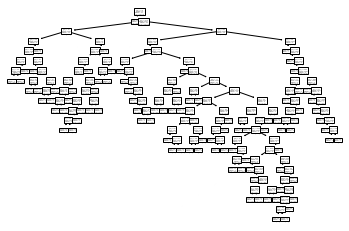

In [ ]:
# visualizing tree 
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)

print(classification_report(y_test,predictions))
tree.plot_tree(dtree)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[32, 32],
       [42, 50]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46        64
           1       0.61      0.54      0.57        92

    accuracy                           0.53       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.54      0.53      0.53       156



In [ ]:
#finding precision,recall,accuracy
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Precision: 0.6097560975609756
Recall: 0.5434782608695652
Accuracy: 0.5256410256410257
